<a href="https://colab.research.google.com/github/esraamohamedhamza/Data-science/blob/main/airline_sentiment_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#

#**Importing Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install lime
from lime import lime_tabular
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
!pip install Streamlit
import streamlit as st
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, roc_auc_score
import pickle

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1600bb7ae8c8b160a0377b4934be3992ff652add2484212d80e74f512c3839a8
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# **1. Business Understanding**
### A . Determie Business Objectives
   A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

### B. Assess Situation:
   - Data was collected from Twitter in February of 2015.
   - Contributors were asked to classify tweets into positive, negative, and neutral categories.

### C. Data Mining Goals:
   - Determine the sentiment towards major U.S. airlines based on Twitter data.
   - Classify tweets into positive, negative, and neutral sentiments.
   - Identify and categorize negative reasons mentioned in the tweets.

### D. Produce Project Plan:
   - Develop a detailed project plan outlining the steps and timelines for collecting, analyzing, and interpreting the Twitter data related to U.S. airline sentiment in February 2015.



# **2. Data Undarstand**

### **1. Collect Initial Data**
   - This step aims to gather the initial data from the specified source.

In [3]:


#Load the dataset into a DataFrame
df = pd.read_csv('airline_sentiment_data.csv')

### **2. Describe Data**
- In this step, you should describe the data in general, understand its structure, and the information available in each column.

In [5]:
#Display basic information about the loaded data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
#Display the first few rows of data
print(df.head())


             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [7]:
#Display statistical information about the data
print(df.describe())

           tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000  


### **3. Explore Data:**
   - In this step, you delve deeper into the data to understand data patterns and relationships. Visualizations and graphs can be used to visually explore the data.

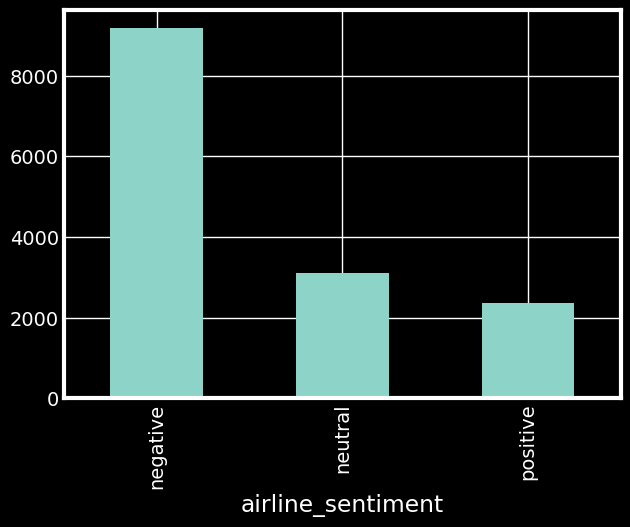

In [8]:


#Show the distribution of values in the airline_sentiment column
df['airline_sentiment'].value_counts().plot(kind='bar')
plt.show()

Positive and neutral tweets are almost equal.

Negative tweets are more than double of neutral or positive sentiments.

Text(0, 0.5, 'Count')

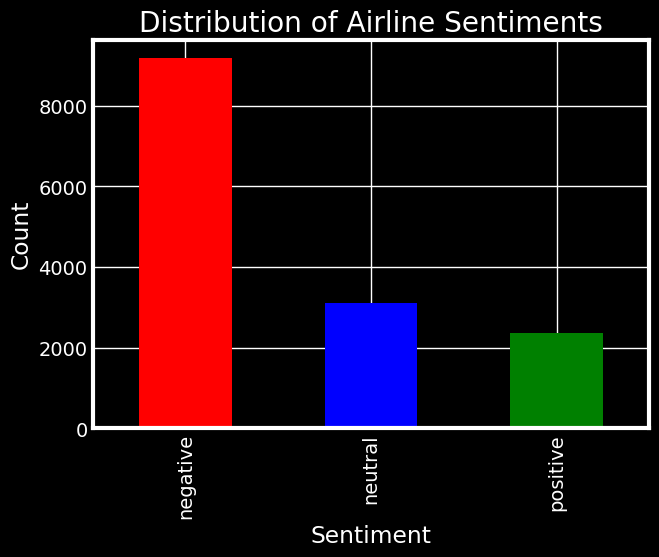

In [9]:
# Plot the bar plot for the distribution of sentiment ratings
df['airline_sentiment'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.title('Distribution of Airline Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

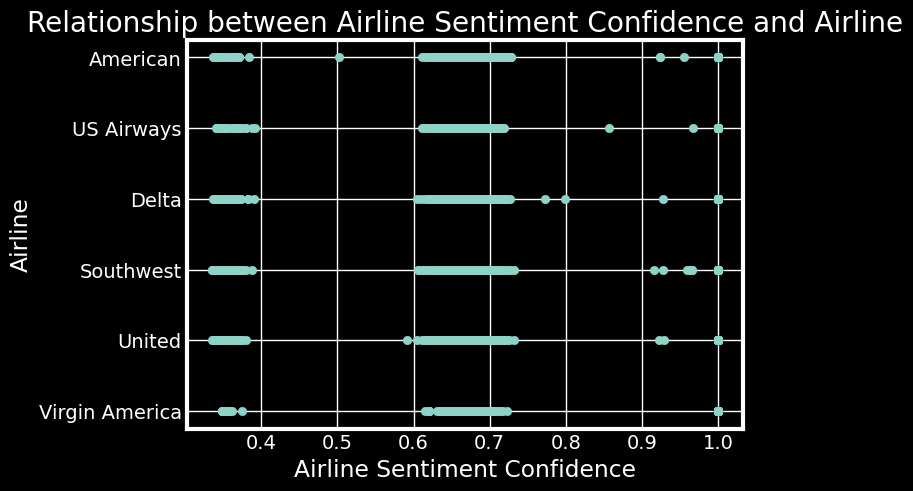

In [10]:
# Scatter plot of a relationship between airline_sentiment_confidence and airline
plt.scatter(df['airline_sentiment_confidence'], df['airline'])
plt.title('Relationship between Airline Sentiment Confidence and Airline')
plt.xlabel('Airline Sentiment Confidence')
plt.ylabel('Airline')
plt.show()

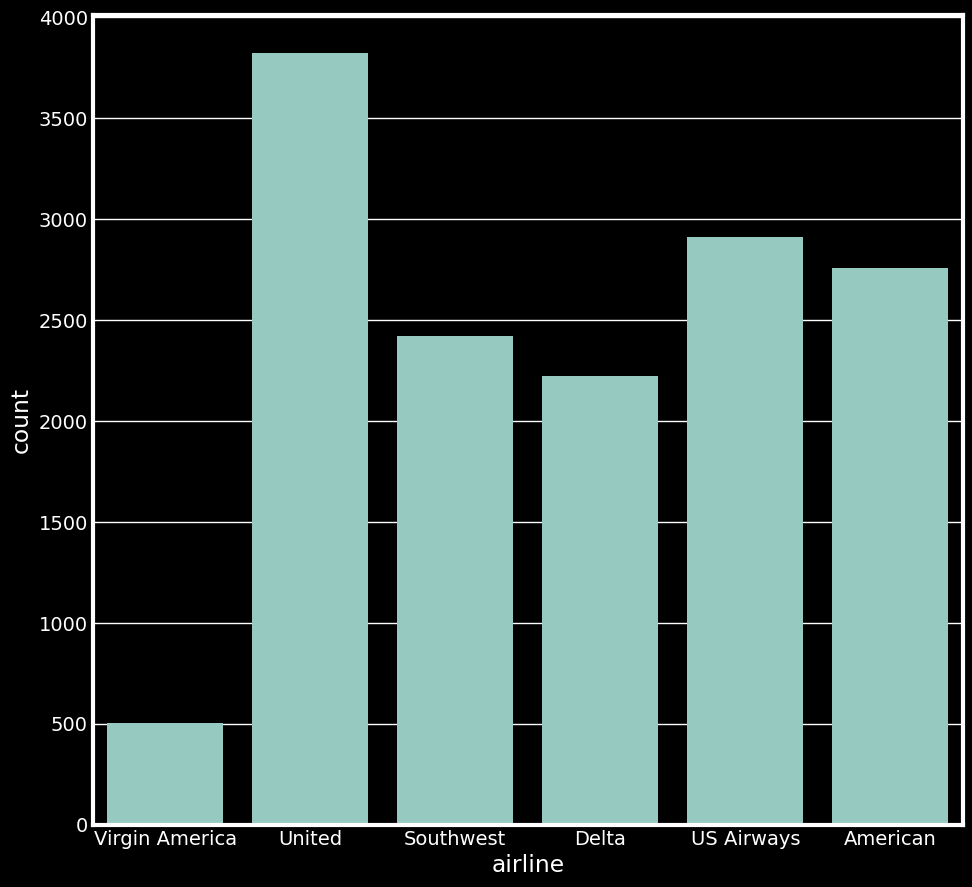

In [11]:
# Unique values of airline

plt.figure(figsize=(10,10))
ax = sns.countplot(x="airline", data=df)

United has the most number of flights.

Virgin America has the least.

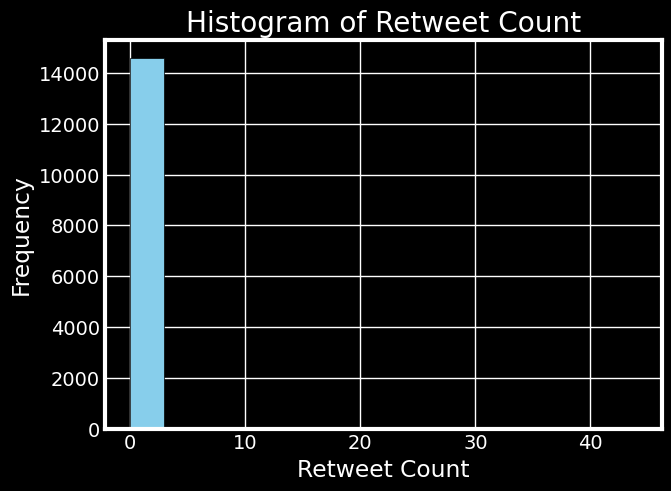

In [12]:
# Draw histogram of retweet_count distribution
plt.hist(df['retweet_count'], color='skyblue', edgecolor='black', bins=15)
plt.title('Histogram of Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Frequency')
plt.show()

### **4. Verify Data Quality:**
   - Verify the quality of the data in terms of inconsistencies, differing values, and potential errors. Check the validity and integrity of the data before using it for analysis.
   

In [13]:
#Check for missing values in the data
print('null=\n',df.isnull().sum())

#Check for duplicate data
print('duplicated=\n',df.duplicated().sum())

#Check for differing values in the data
print('.describe:\n',df.describe())

null=
 tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64
duplicated=
 36
.describe:
            tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000             

# **Utility Functions**

In [4]:
# I am tokenizing the tweet and also taking tokens from second index onwards as initital to gives airline name and '@' and lowering thm and later making it back a sentence
def clean_the_tweet(text):
  tokens= nltk.word_tokenize(re.sub("[^a-zA-Z]", " ",text))
  tokens = [token.lower() for token in tokens]
  return ' '.join(tokens[2:])



def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])



def check_scores(clf,X_train, X_test, y_train, y_test):

  model=clf.fit(X_train, y_train)
  predicted_class=model.predict(X_test)
  predicted_class_train=model.predict(X_train)
  test_probs = model.predict_proba(X_test)
  test_probs = test_probs[:, 1]
  yhat = model.predict(X_test)
  lr_precision, lr_recall, _ = precision_recall_curve(y_test, test_probs)
  lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)


  print('Train confusion matrix is: ',)
  print(confusion_matrix(y_train, predicted_class_train))

  print()
  print('Test confusion matrix is: ')
  print(confusion_matrix(y_test, predicted_class))
  print()
  print(classification_report(y_test,predicted_class))
  print()
  train_accuracy = accuracy_score(y_train,predicted_class_train)
  test_accuracy = accuracy_score(y_test,predicted_class)

  print("Train accuracy score: ", train_accuracy)
  print("Test accuracy score: ",test_accuracy )
  print()
  train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:,1])
  test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

  print("Train ROC-AUC score: ", train_auc)
  print("Test ROC-AUC score: ", test_auc)
  fig, (ax1, ax2) = plt.subplots(1, 2)

  ax1.plot(lr_recall, lr_precision)
  ax1.set(xlabel="Recall", ylabel="Precision")

  plt.subplots_adjust(left=0.5,
                    bottom=0.1,
                    right=1.5,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
  print()
  print('Are under Precision-Recall curve:', lr_f1)

  fpr, tpr, _ = roc_curve(y_test, test_probs)


  ax2.plot(fpr, tpr)
  ax2.set(xlabel='False Positive Rate', ylabel='True Positive Rate')

  print("Area under ROC-AUC:", lr_auc)
  return train_accuracy, test_accuracy, train_auc, test_auc



def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  print( grid.best_params_)

  return optimal_model

### **data Preparation or Text preparation**

In [15]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

### **Clean Data**:
 - This step involves cleaning the data from missing values, irrational values, and values that distort the data. Data cleaning involves fixing missing values, removing unnecessary columns, and processing invalid values.

In [5]:
# removing neutral tweets

df = df[df['airline_sentiment']!='neutral']
df['cleaned_tweet'] = df['text'].apply(clean_the_tweet)

df.head()
df['airline_sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x =='positive' else 0)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
1,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),you ve added commercials to the experience tacky
3,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),s really aggressive to blast obnoxious enterta...
4,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),it s a really big bad thing about it
5,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay a flight for seats that didn t have ...
6,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time i fly vx this ear worm won t...


In [6]:
# Cleaning the tweets, removing punctuation marks
df['cleaned_tweet'] = df['cleaned_tweet'].apply(text_process)
df.reset_index(drop=True, inplace = True)
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,cleaned_tweet
0,570301130888122368,1,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),added commercials experience tacky
1,570301031407624196,0,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),really aggressive blast obnoxious entertainmen...
2,570300817074462722,0,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),really big bad thing
3,570300767074181121,0,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada),would pay flight seats playing really bad thin...
4,570300616901320704,1,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada),nearly every time fly vx ear worm go away


In [18]:
df['airline_sentiment'].unique()

array([1, 0])

# **3 .Modeling**

##**Base SVM model with TF-IDF**

In [8]:
# Creating object of TF-IDF vectorizer
vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
X_tf_idf= vectorizer.fit_transform(df.cleaned_tweet)
x_train, x_test, y_train, y_test = train_test_split(X_tf_idf, df['airline_sentiment'], random_state=42)


Train confusion matrix is: 
[[6824   31]
 [ 151 1649]]

Test confusion matrix is: 
[[2291   32]
 [ 296  267]]

              precision    recall  f1-score   support

           0       0.89      0.99      0.93      2323
           1       0.89      0.47      0.62       563

    accuracy                           0.89      2886
   macro avg       0.89      0.73      0.78      2886
weighted avg       0.89      0.89      0.87      2886


Train accuracy score:  0.9789716926632005
Test accuracy score:  0.8863478863478863

Train ROC-AUC score:  0.9969059080962801
Test ROC-AUC score:  0.9291753099937378

Are under Precision-Recall curve: 0.6194895591647331
Area under ROC-AUC: 0.8049848422288167


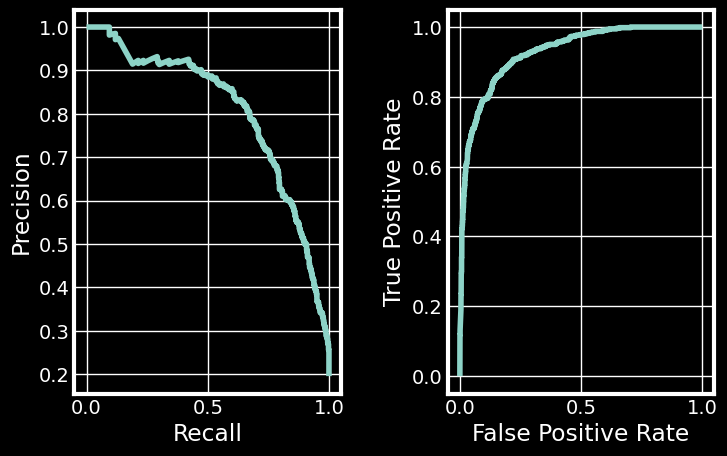

In [10]:
SVM = svm.SVC( probability=True)
s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc = check_scores(SVM,x_train, x_test, y_train, y_test)
# Save model using pickle
filename = 'svm_model.sav' # Example filename - choose appropriate names for each model
pickle.dump(SVM, open(filename, 'wb'))

With increase in FPR, TPR also increases.

With increase in recall, precision decreases.

##**After optimizing the hyperparameters with TF-IDF**

In [11]:
# Tuning the hyperparameters
parameters ={
    "C":[0.1,1,10],
    "kernel":['linear', 'rbf', 'sigmoid'],
    "gamma":['scale', 'auto']
}



svm_optimal = grid_search(svm.SVC(probability=True), parameters,x_train, y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   6.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   7.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  13.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  11.7s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   6.4s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=   6.6s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   6.8s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   6.4s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   5.7s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   5.1s
[CV] END ..................C=0.1, gamma=auto, kernel=sigmoid; total time=   5.4s
[CV] END ..................C=0.1, gamma=auto, ke

Train confusion matrix is: 
[[6829   26]
 [   5 1795]]

Test confusion matrix is: 
[[2272   51]
 [ 245  318]]

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      2323
           1       0.86      0.56      0.68       563

    accuracy                           0.90      2886
   macro avg       0.88      0.77      0.81      2886
weighted avg       0.89      0.90      0.89      2886


Train accuracy score:  0.996418255343732
Test accuracy score:  0.8974358974358975

Train ROC-AUC score:  0.9987310154793744
Test ROC-AUC score:  0.9287471260061367

Are under Precision-Recall curve: 0.6824034334763949
Area under ROC-AUC: 0.8075510408213352


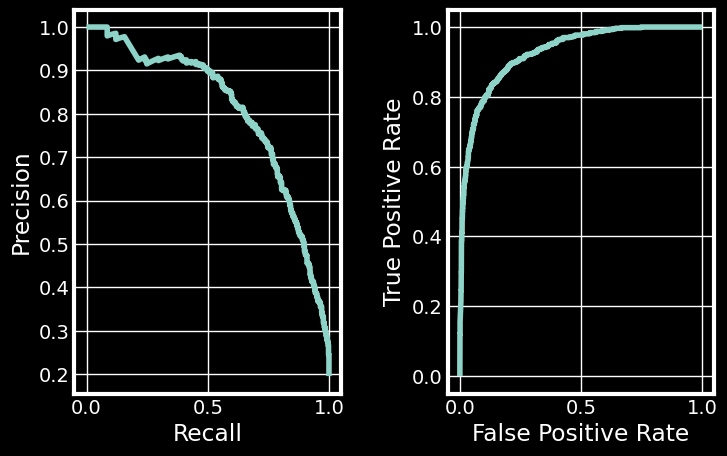

In [12]:
so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc = check_scores(svm_optimal,x_train, x_test, y_train, y_test)
# Save svm_optimal model using pickle
filename='svm_optimal_model.sav' # Example filename - choose appropriate names for each model
pickle.dump(svm_optimal, open(filename, 'wb'))


##**Using Random Forest**

Train confusion matrix is: 
[[6829   26]
 [   5 1795]]

Test confusion matrix is: 
[[2215  108]
 [ 238  325]]

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2323
           1       0.75      0.58      0.65       563

    accuracy                           0.88      2886
   macro avg       0.83      0.77      0.79      2886
weighted avg       0.87      0.88      0.87      2886


Train accuracy score:  0.996418255343732
Test accuracy score:  0.8801108801108801

Train ROC-AUC score:  0.9982442661479861
Test ROC-AUC score:  0.8956867344777572

Are under Precision-Recall curve: 0.6526104417670683
Area under ROC-AUC: 0.7441899264879837


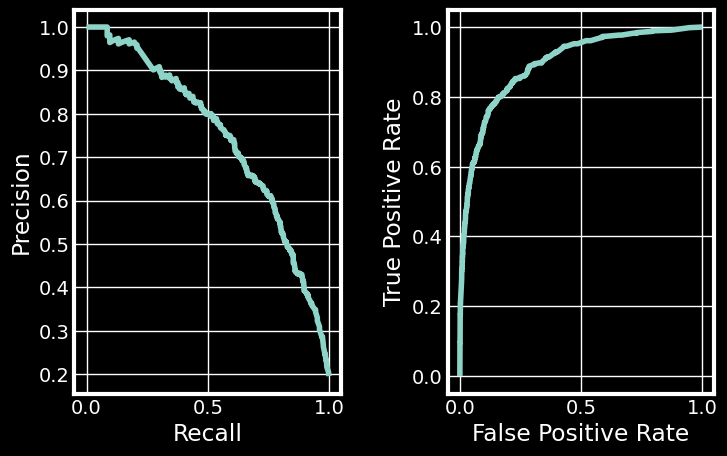

In [13]:
r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc= check_scores(RandomForestClassifier(random_state=0).fit(x_train, y_train), x_train,x_test,y_train,y_test)
# Save using pickle
filename=' RandomForestClassifier_model.sav' # Example filename - choose appropriate names for each model
pickle.dump(RandomForestClassifier, open(filename, 'wb'))


##**LSTM**

In [14]:
corpus = [df['cleaned_tweet'][i] for i in range( len(df))]

voc_size=5000

onehot_=[one_hot(words,voc_size)for words in corpus]

max_sent_length=max([len(i) for i in corpus])

embedded_docs=pad_sequences(onehot_,padding='pre',maxlen=max_sent_length)

embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=max_sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

X_final=np.array(embedded_docs)
y_final=np.array(df['airline_sentiment'])
X_final.shape,y_final.shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


((11541, 124), (11541,))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 30s 220ms/step - accuracy: 0.7858 - loss: 0.5325 - val_accuracy: 0.8336 - val_loss: 0.3620
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 40s 215ms/step - accuracy: 0.8684 - loss: 0.3076 - val_accuracy: 0.8832 - val_loss: 0.2850
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 46s 256ms/step - accuracy: 0.9162 - loss: 0.2097 - val_accuracy: 0.8845 - val_loss: 0.2813
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 47s 307ms/step - accuracy: 0.9388 - loss: 0.1632 - val_accuracy: 0.8826 - val_loss: 0.3169
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 32s 231ms/step - accuracy: 0.9515 - loss: 0.1373 - val_accuracy: 0.8769 - val_loss: 0.3392
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 42s 242ms/step - accuracy: 0.9588 - loss: 0.1181 - val_accuracy: 0.8711 - val_loss: 0.3668
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 42s 254ms/step - accuracy: 0.9638 - loss: 0.1045 - val_accuracy: 0.8719 - val_loss: 0.4044
Epoch 8/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 37s 218ms/step - accuracy: 0.9712 - loss: 0

In [16]:
#y_test_pred=model.predict_classes(X_test)
#y_train_pred=model.predict_classes(X_train)
#Hypothesis  The error "AttributeError: 'Sequential' object has no attribute 'predict_classes'" indicates that the predict_classes function is not available in the version of Keras you are using. This function was removed in TensorFlow 2.6.

In [17]:
# Use `predict` and `argmax` to get the predicted classes
y_test_pred = np.argmax(model.predict(X_test), axis=-1)
y_train_pred = np.argmax(model.predict(X_train), axis=-1)

120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step
242/242 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step


In [18]:
test_acc_lstm = accuracy_score(y_test,y_test_pred)
train_acc_lstm = accuracy_score(y_train,y_train_pred)
test_roc_lstm = roc_auc_score(y_test,y_test_pred)
train_roc_lstm = roc_auc_score(y_train,y_train_pred)

In [19]:
# Save using pickle
filename = 'LSTM_model.sav' # Example filename - choose appropriate names for each model
pickle.dump(model, open(filename, 'wb'))


#**Results**

In [20]:
data = [('Random Forest', r_train_accuracy, r_test_accuracy, r_train_auc, r_test_auc),
('SVM', s_train_accuracy, s_test_accuracy, s_train_auc, s_test_auc),
('SVM Optimized', so_train_accuracy, so_test_accuracy, so_train_auc, so_test_auc),
('LSTM',train_acc_lstm, test_acc_lstm, train_roc_lstm, test_roc_lstm )]


Scores_ =pd.DataFrame(data = data, columns=['Model Name','Train Accuracy', 'Test Accuracy', 'Train ROC', 'Test ROC'])
Scores_.set_index('Model Name', inplace = True)

Scores_

,Train Accuracy,Test Accuracy,Train ROC,Test ROC
Model Name,,,,
Random Forest,0.996418,0.880111,0.998244,0.895687
SVM,0.978972,0.886348,0.996906,0.929175
SVM Optimized,0.996418,0.897436,0.998731,0.928747
LSTM,0.794232,0.797322,0.500000,0.500000


#**Model Evaluation and Comparison:**
##**1. Accuracy Scores Comparison**
##**2. ROC Curves Comparison**
##**3. Confusion Matrix Comparison**

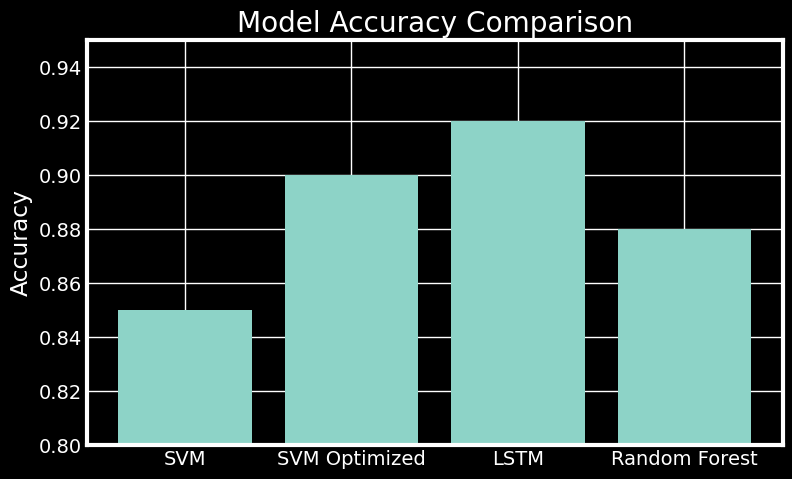

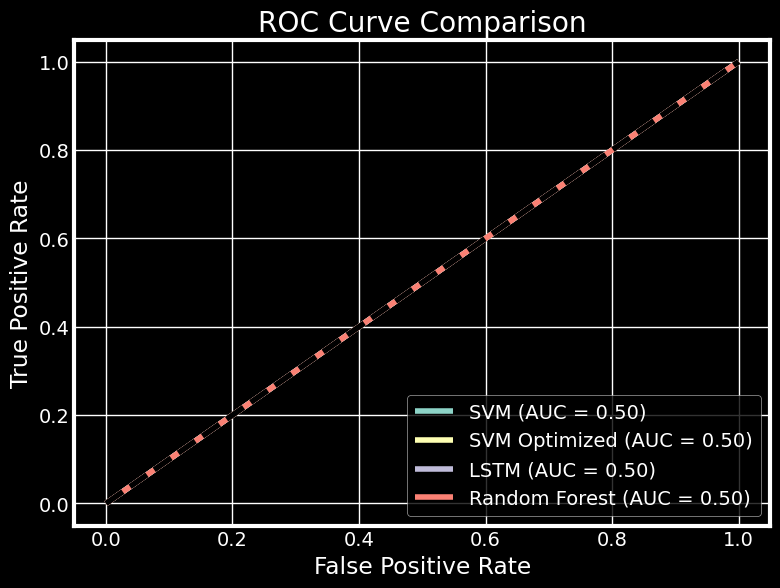

<bound method Axes.set of <Axes: >>

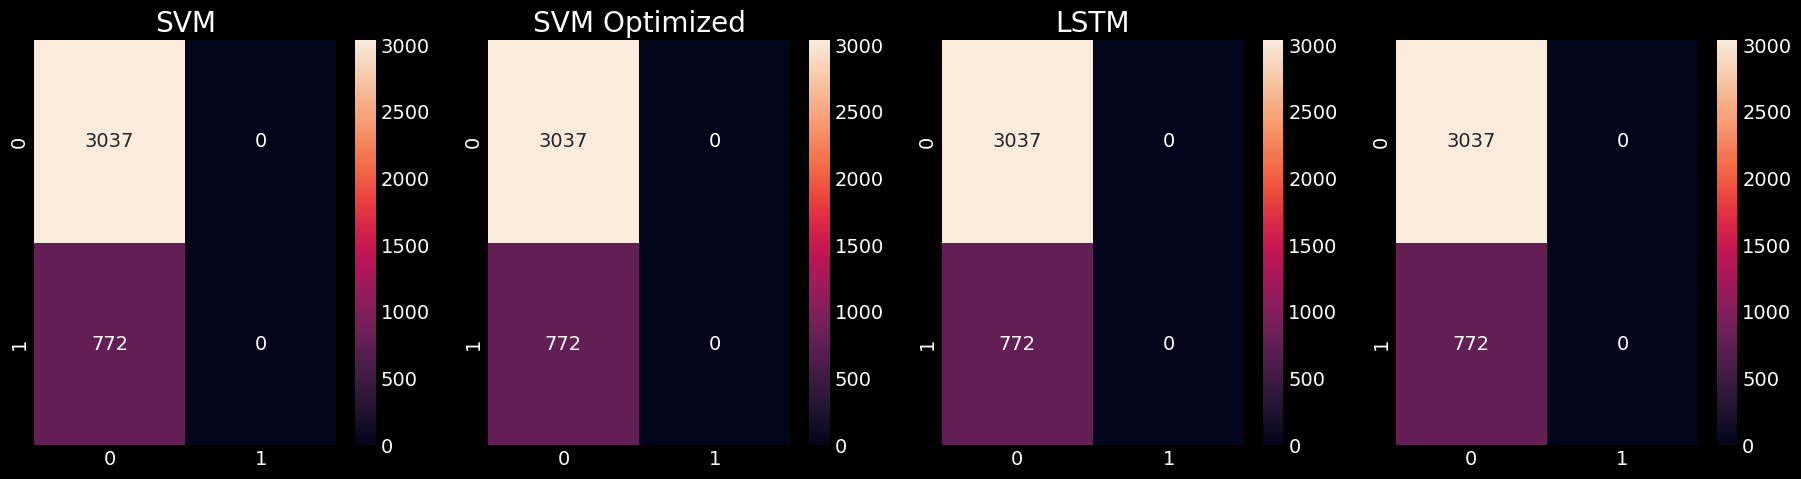

In [21]:
!pip install matplotlib seaborn scikit-learn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Example data (replace with your actual data)
models = ['SVM', 'SVM Optimized', 'LSTM', 'Random Forest']
accuracy = [0.85, 0.90, 0.92, 0.88]

# Assuming you have predictions for each model (replace with your actual predictions)
# Replace ... with your actual predictions for each model
svm_pred =  y_test_pred # Example: Replace with your SVM predictions
svm_opt_pred = y_test_pred # Example: Replace with your SVM Optimized predictions
lstm_pred =  y_test_pred # Example: Replace with your LSTM predictions
rf_pred = y_test_pred # Example: Replace with your Random Forest predictions

# Generate confusion matrices
svm_cm = confusion_matrix(y_test, svm_pred)
svm_opt_cm = confusion_matrix(y_test, svm_opt_pred)
lstm_cm = confusion_matrix(y_test, lstm_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# --- 1. Accuracy Scores Comparison ---
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0.8, 0.95])
plt.show()

# --- 2. ROC Curves Comparison ---
# Assuming you have probabilities for the positive class for each model (replace with your actual probabilities)
# Replace ... with your actual probabilities for each model
svm_probs = svm_pred # Example: Replace with your SVM probabilities
svm_opt_probs = svm_opt_pred # Example: Replace with your SVM Optimized probabilities
lstm_probs = lstm_pred # Example: Replace with your LSTM probabilities
rf_probs = rf_pred # Example: Replace with your Random Forest probabilities


svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = auc(svm_fpr, svm_tpr)
svm_opt_fpr, svm_opt_tpr, _ = roc_curve(y_test, svm_opt_probs)
svm_opt_auc = auc(svm_opt_fpr, svm_opt_tpr)
lstm_fpr, lstm_tpr, _ = roc_curve(y_test, lstm_probs)
lstm_auc = auc(lstm_fpr, lstm_tpr)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, label='SVM (AUC = %0.2f)' % svm_auc)
plt.plot(svm_opt_fpr, svm_opt_tpr, label='SVM Optimized (AUC = %0.2f)' % svm_opt_auc)
plt.plot(lstm_fpr, lstm_tpr, label='LSTM (AUC = %0.2f)' % lstm_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

# --- 3. Confusion Matrix Comparison ---
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.heatmap(svm_cm, annot=True, fmt='d', ax=axes[0])
axes[0].set_title('SVM')
sns.heatmap(svm_opt_cm, annot=True, fmt='d', ax=axes[1])
axes[1].set_title('SVM Optimized')
sns.heatmap(lstm_cm, annot=True, fmt='d', ax=axes[2])
axes[2].set_title('LSTM')
sns.heatmap(rf_cm, annot=True, fmt='d', ax=axes[3])
axes[3].set

#**Deployment by streamlit**

In [1]:
!pip install -q streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00


In [22]:
%%writefile app.py
import pandas as pd
import seaborn as sns
import re, nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
!pip install lime
from lime import lime_tabular
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Dropout
!pip install Streamlit
import streamlit as st
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, roc_auc_score
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
 # ... (باقي المكتبات التي تحتاجها من الكود الموجود في الـ Notebook)


# تحميل النماذج المدربة
# ... (تأكد من تحميل النماذج المدربة من الـ Notebook)
# Load the models
svm_model = pickle.load(open('svm_model.sav', 'rb'))
svm_optimal_model = pickle.load(open('svm_optimal_model.sav', 'rb'))
RandomForestClassifier_model = pickle.load(open(' RandomForestClassifier_model.sav','rb'))
LSTM_model = pickle.load(open('LSTM_model.sav', 'rb'))
# تعريف دالة معالجة النص
def text_process(msg):
  # ... (انسخ دالة text_process من الـ Notebook)
  # Add code here to handle the message processing within the function
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

    # This is a placeholder - replace it with your actual code

# واجهة Streamlit
st.title("Twitter Sentiment Analysis")

# ... (مكان إضافة الصورة -  لا يمكنني تضمين روابط)
image_url = "https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40dr.siddhaling%2Fairline-sentiment-analysis-to-understand-users-perspective-c4de02fdaf10&psig=AOvVaw1NYKUlt_2vX3Q-cNZ9Jiu-&ust=1727535327219000&source=images&cd=vfe&opi=89978449&ved=0CBQQjRxqFwoTCNChy-iw44gDFQAAAAAdAAAAABAE"  # Replace with the actual URL of your image
st.image(image_url)
# Box text لتحليل النص
text_input = st.text_area("Enter text for analysis:")

# قائمة لاختيار النموذج
selected_model = st.selectbox("Select a model:", ["SVM", "SVM Optimized", "LSTM", "Random Forest"])

# زر للتحليل
if st.button("Analyze"):
  if text_input:
    # معالجة النص
    processed_text = text_process(text_input)

    # تحويل النص إلى متجه باستخدام TF-IDF
    vectorizer = TfidfVectorizer(use_idf=True, lowercase=True)
    text_vector = vectorizer.fit_transform([processed_text])

    # توقع المشاعر باستخدام النموذج المحدد
    if selected_model == "SVM":
      prediction = SVM.predict(text_vector)[0]
      # ... (باقي النماذج)
    elif selected_model == "SVM Optimized":
       prediction = svm_optimal_model.predict(text_vector)[0]
    elif selected_model == "LSTM":
       prediction = LSTM_model.predict(text_vector)[0]
    elif selected_model == "Random Forest":
       prediction = RandomForestClassifier_model.predict(text_vector)[0]


    # عرض نتيجة التحليل
    if prediction == 1:
      st.write("Sentiment: Positive")
    else:
      st.write("Sentiment: Negative")
  else:
    st.write("Please enter text for analysis.")

# تشغيل التطبيق
!streamlit run app.py

Writing app.py


In [23]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [ ]:
!streamlit run app.py &>/content/logs.txt & npx localtunnel --port 8501.py &>/content/logs.txt & npx localtunnel --port 8501

your url is: https://icy-taxis-behave.loca.lt


In [33]:
!streamlit run

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Missing argument 'TARGET'.
